 Univariate analysis for 'datetime'
------------------------------------------------------------
 Variable type: Categorical

 Descriptive statistics for 'datetime':

count                  876100
unique                   8761
top       2015-01-01 06:00:00
freq                      100
Name: datetime, dtype: object

 Value counts for 'datetime':

datetime
2015-01-01 06:00:00    100
2015-09-01 17:00:00    100
2015-09-01 11:00:00    100
2015-09-01 12:00:00    100
2015-09-01 13:00:00    100
                      ... 
2015-05-02 17:00:00    100
2015-05-02 16:00:00    100
2015-05-02 15:00:00    100
2015-05-02 14:00:00    100
2016-01-01 06:00:00    100
Name: count, Length: 8761, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_5600\707701485.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.data[col], palette='Set2')


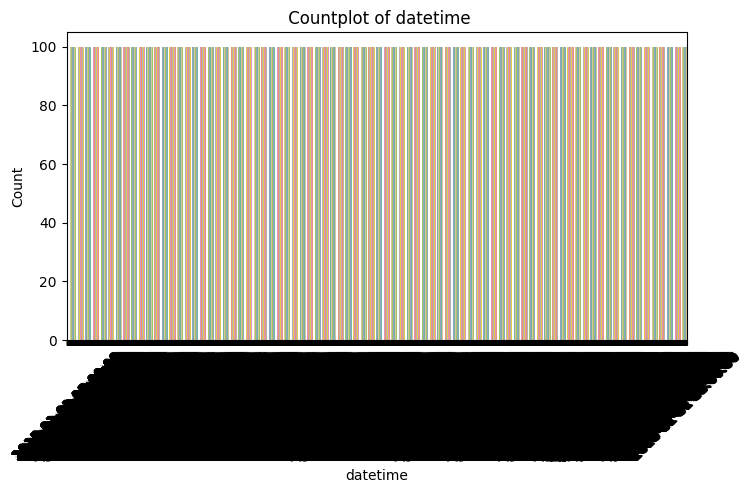


 Missing values in 'datetime': 0
 Univariate analysis for 'machineID'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for 'machineID':

count    876100.000000
mean         50.500000
std          28.866087
min           1.000000
25%          25.750000
50%          50.500000
75%          75.250000
max         100.000000
Name: machineID, dtype: float64


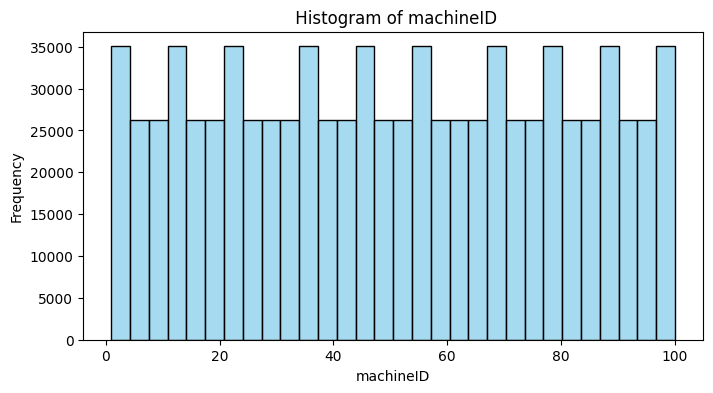

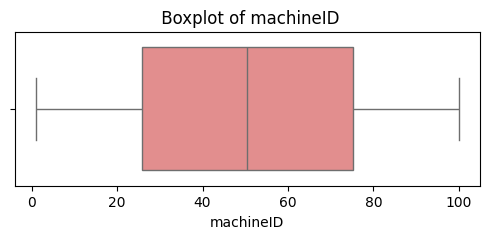

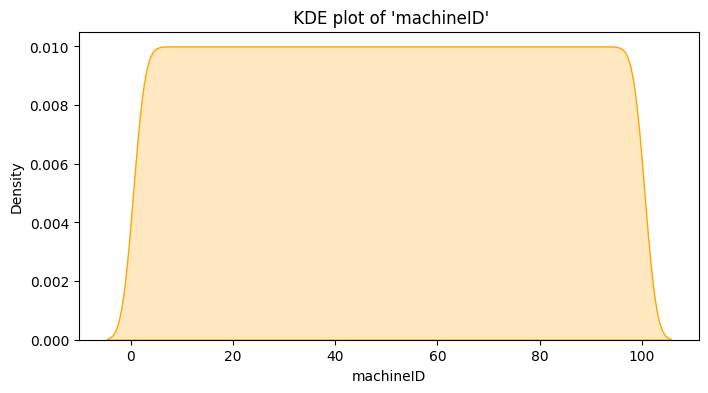

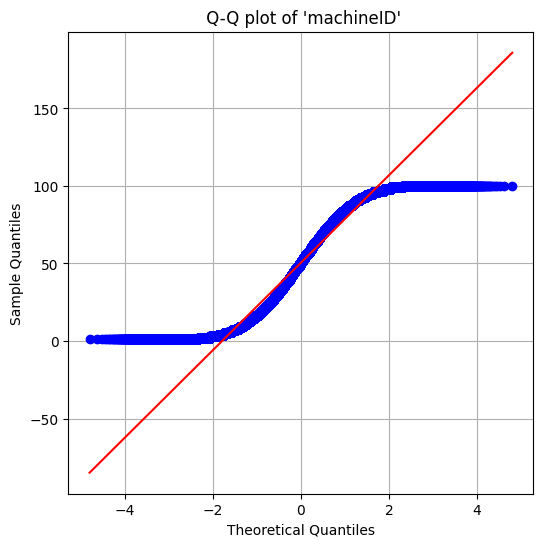


 Missing values in 'machineID': 0

 Skewness of 'machineID': 0.00
 Kurtosis of 'machineID': -1.20
 'machineID' is approximately symmetric.
 Univariate analysis for 'volt'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for 'volt':

count    876100.000000
mean        170.777736
std          15.509114
min          97.333604
25%         160.304927
50%         170.607338
75%         181.004493
max         255.124717
Name: volt, dtype: float64


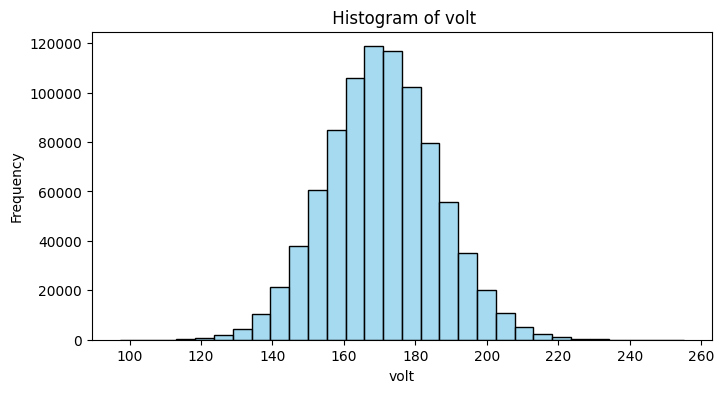

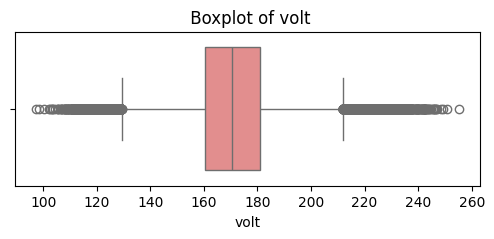

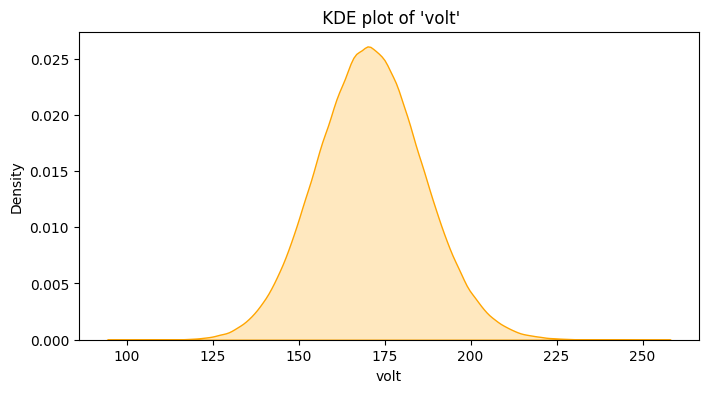

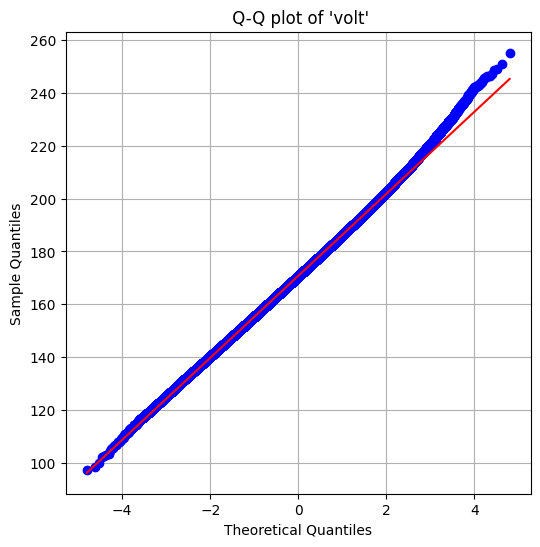


 Missing values in 'volt': 0

 Skewness of 'volt': 0.09
 Kurtosis of 'volt': 0.12
 'volt' is approximately symmetric.
 Univariate analysis for 'rotate'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for 'rotate':

count    876100.000000
mean        446.605119
std          52.673886
min         138.432075
25%         412.305714
50%         447.558150
75%         482.176600
max         695.020984
Name: rotate, dtype: float64


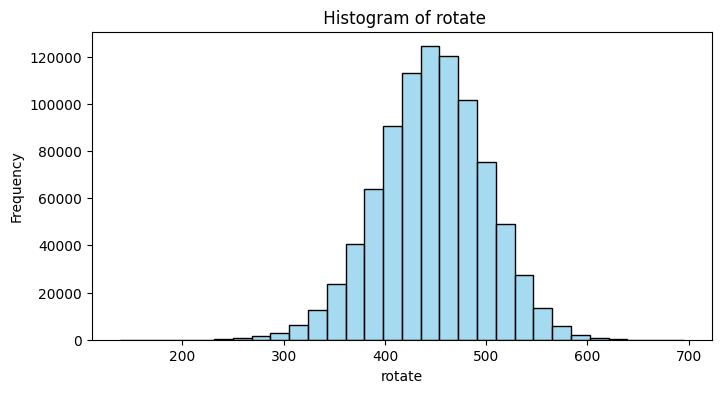

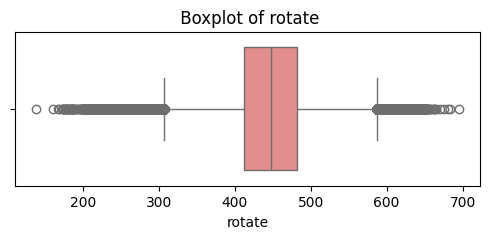

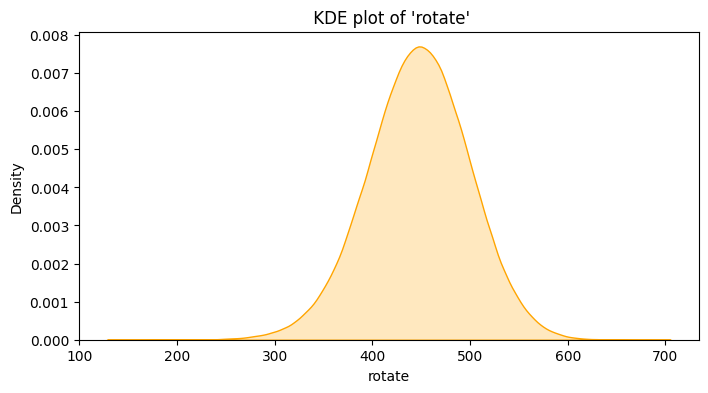

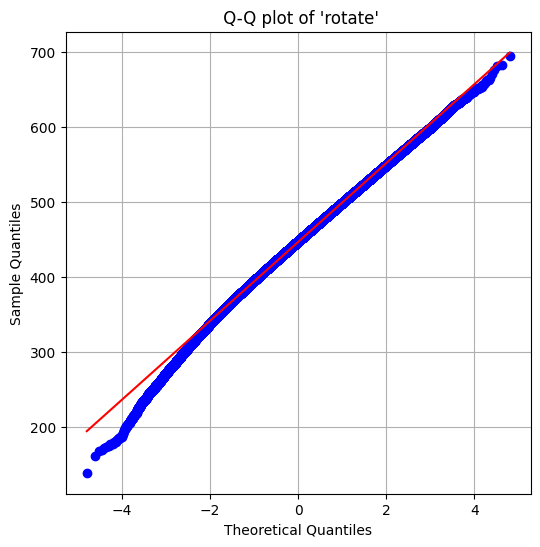


 Missing values in 'rotate': 0

 Skewness of 'rotate': -0.14
 Kurtosis of 'rotate': 0.20
 'rotate' is approximately symmetric.
 Univariate analysis for 'pressure'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for 'pressure':

count    876100.000000
mean        100.858668
std          11.048679
min          51.237106
25%          93.498181
50%         100.425559
75%         107.555231
max         185.951998
Name: pressure, dtype: float64


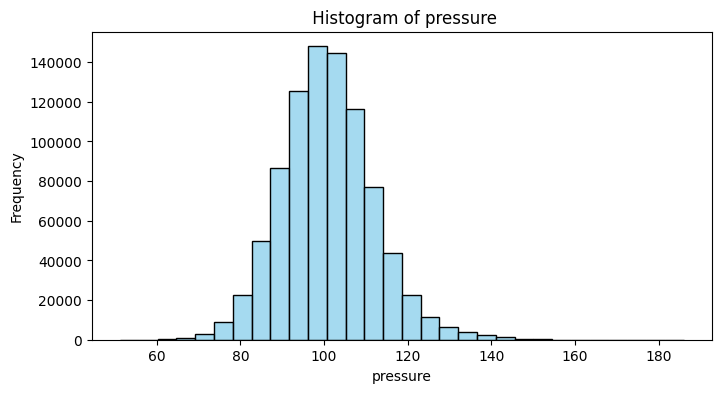

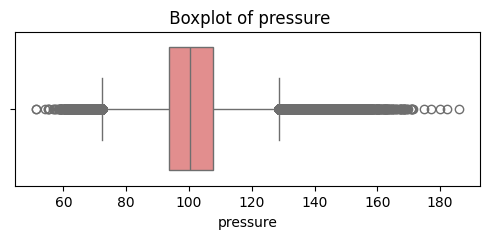

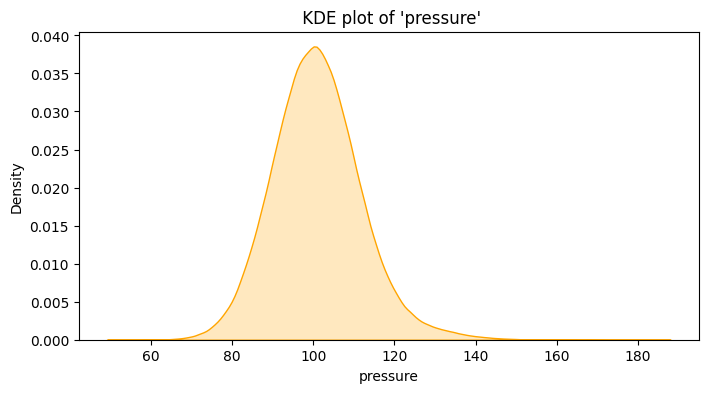

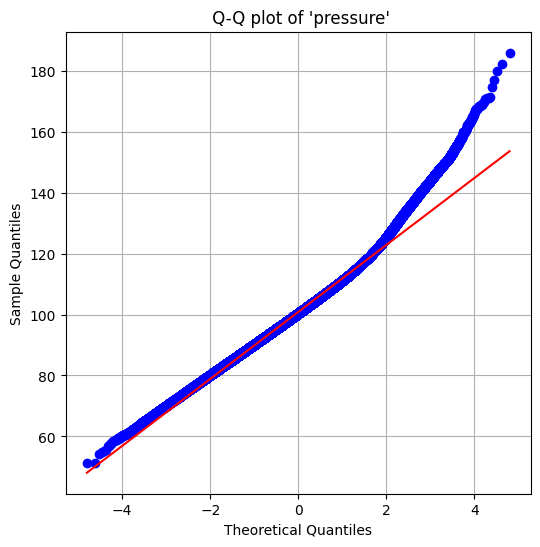


 Missing values in 'pressure': 0

 Skewness of 'pressure': 0.40
 Kurtosis of 'pressure': 0.88
 'pressure' is approximately symmetric.
 Univariate analysis for 'vibration'
------------------------------------------------------------
 Variable type: Numerical

 Descriptive statistics for 'vibration':

count    876100.000000
mean         40.385007
std           5.370361
min          14.877054
25%          36.777299
50%          40.237247
75%          43.784938
max          76.791072
Name: vibration, dtype: float64


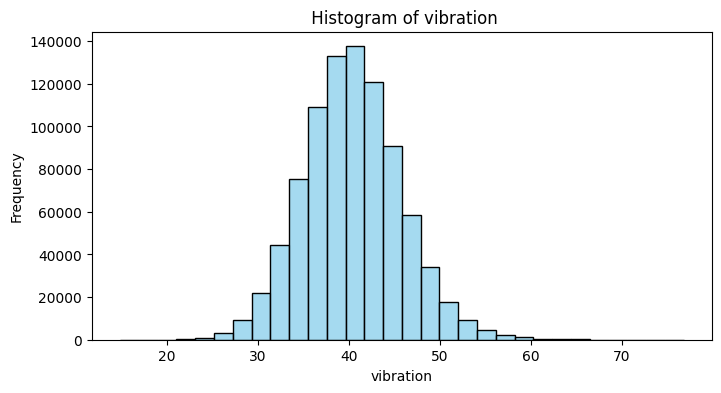

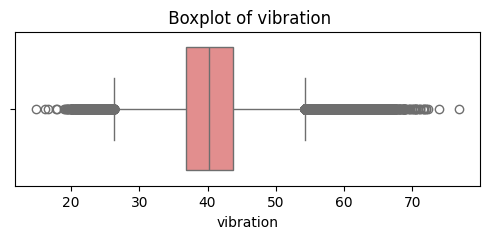

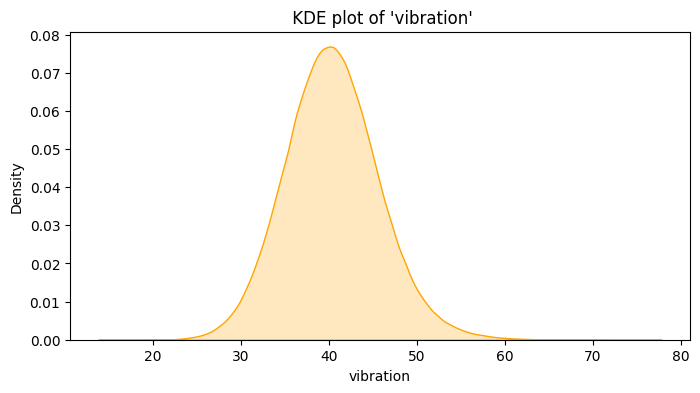

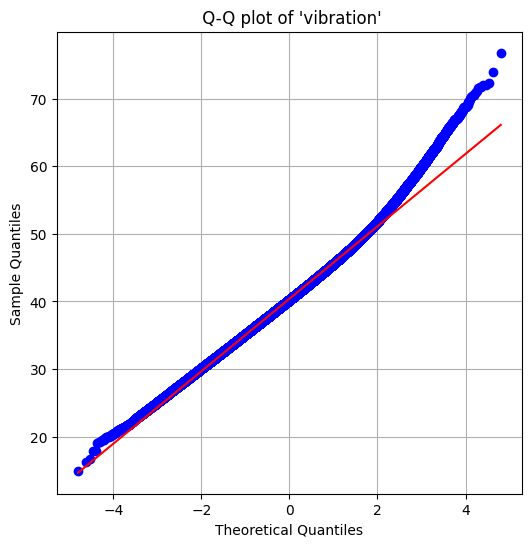


 Missing values in 'vibration': 0

 Skewness of 'vibration': 0.25
 Kurtosis of 'vibration': 0.47
 'vibration' is approximately symmetric.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats

class univariate_analyser:
    def __init__(self, data):
        self.data = data

    def describe_variables(self, col):
        print(f"\n Descriptive statistics for '{col}':\n")
        print(self.data[col].describe(include='all'))

    def missing_values(self, col):
        print(f"\n Missing values in '{col}': {self.data[col].isnull().sum()}")

    def value_counts(self, col):
        print(f"\n Value counts for '{col}':\n")
        print(self.data[col].value_counts())

    def countplot(self, col):
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.data[col], palette='Set2')
        plt.title(f' Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    def histogram(self, col):
        plt.figure(figsize=(8, 4))
        sns.histplot(self.data[col], bins=30, kde=False, color='skyblue')
        plt.title(f' Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    def boxplot(self, col):
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=self.data[col], color='lightcoral')
        plt.title(f" Boxplot of {col}")
        plt.xlabel(col)
        plt.show()

    def kde_plot(self, col):
        plt.figure(figsize=(8, 4))
        sns.kdeplot(self.data[col].dropna(), color='orange', fill=True)
        plt.title(f" KDE plot of '{col}'")
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

    def qq_plot(self, col):
        plt.figure(figsize=(6, 6))
        stats.probplot(self.data[col].dropna(), dist='norm', plot=plt)
        plt.title(f" Q-Q plot of '{col}'")
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')
        plt.grid(True)
        plt.show()

    def skewness_kurtosis(self, col):
        skewness = self.data[col].skew()
        kurtosis = self.data[col].kurtosis()
        print(f"\n Skewness of '{col}': {skewness:.2f}")
        print(f" Kurtosis of '{col}': {kurtosis:.2f}")
        if abs(skewness) < 0.5:
            print(f" '{col}' is approximately symmetric.")
        elif abs(skewness) < 1:
            print(f" '{col}' is moderately skewed.")
        else:
            print(f" '{col}' is highly skewed.")

    def detect_type(self, col):
        if self.data[col].dtype == 'object' or self.data[col].nunique() < 15:
            return 'categorical'
        else:
            return 'numerical'

    def run_all(self, col):
        print("=" * 60)
        print(f" Univariate analysis for '{col}'")
        print("-" * 60)
        
        var_type = self.detect_type(col)
        print(f" Variable type: {var_type.capitalize()}")

        if var_type == 'categorical':
            self.describe_variables(col)
            self.value_counts(col)
            self.countplot(col)
            self.missing_values(col)
        else:
            self.describe_variables(col)
            self.histogram(col)
            self.boxplot(col)
            self.kde_plot(col)
            self.qq_plot(col)
            self.missing_values(col)
            self.skewness_kurtosis(col)

        print("=" * 60)
df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_telemetry.csv")

eda = univariate_analyser(df)

# Run analysis on a few variables
eda.run_all("datetime")
eda.run_all("machineID")
eda.run_all("volt")
eda.run_all("rotate")
eda.run_all("pressure")
eda.run_all("vibration")


In [5]:
import pandas as pd

# Load the uploaded dataset
file_path = "C:/Users/user/Downloads/archive (8)/PdM_telemetry.csv" 
df = pd.read_csv(file_path)

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


(None,
               datetime  machineID        volt      rotate    pressure  \
 0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
 1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
 2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
 3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
 4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
 
    vibration  
 0  45.087686  
 1  43.413973  
 2  34.178847  
 3  41.122144  
 4  25.990511  )

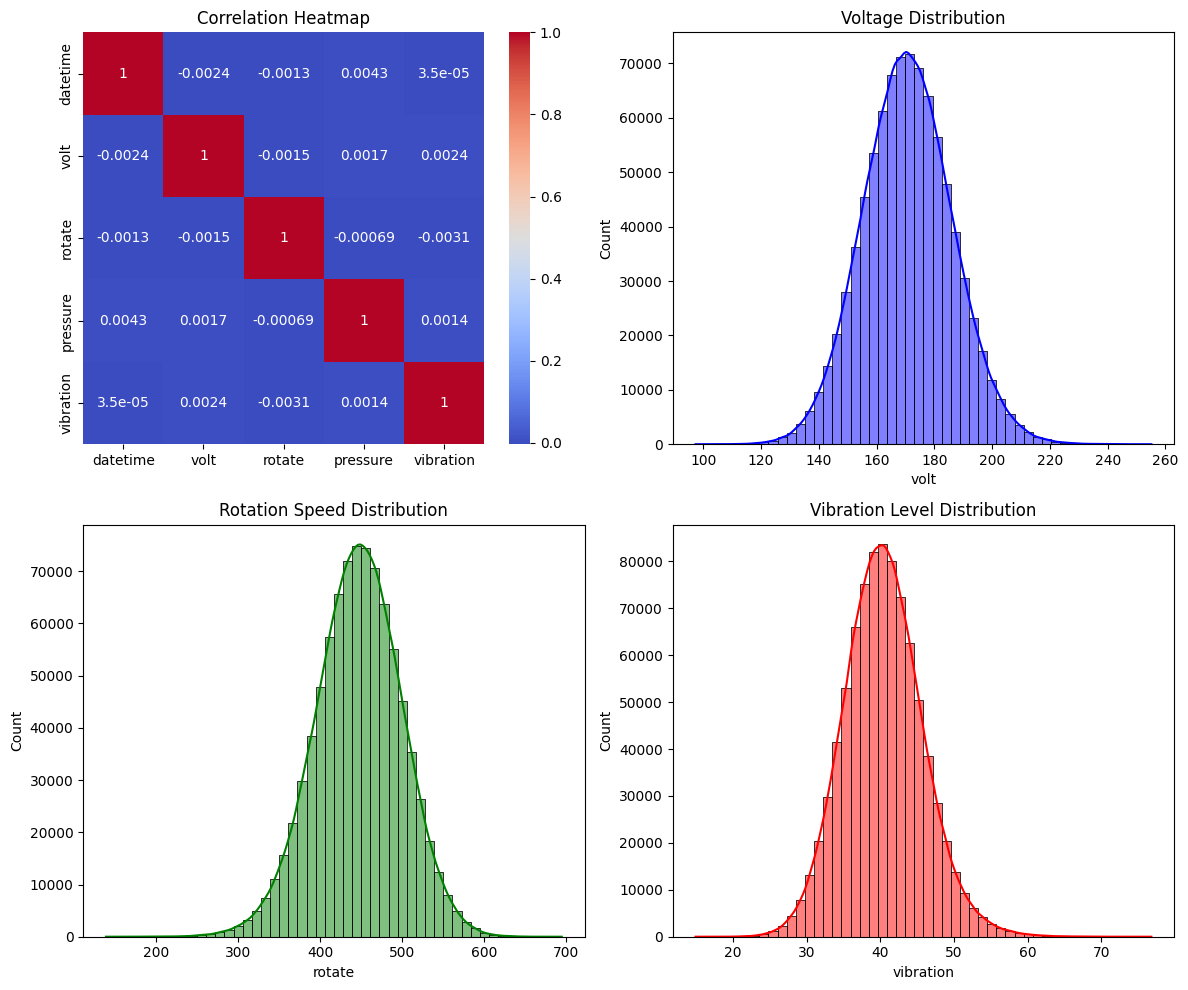

(                  datetime      machineID           volt         rotate  \
 count               876100  876100.000000  876100.000000  876100.000000   
 mean   2015-07-02 18:00:00      50.500000     170.777736     446.605119   
 min    2015-01-01 06:00:00       1.000000      97.333604     138.432075   
 25%    2015-04-02 12:00:00      25.750000     160.304927     412.305714   
 50%    2015-07-02 18:00:00      50.500000     170.607338     447.558150   
 75%    2015-10-02 00:00:00      75.250000     181.004493     482.176600   
 max    2016-01-01 06:00:00     100.000000     255.124717     695.020984   
 std                    NaN      28.866087      15.509114      52.673886   
 
             pressure      vibration  
 count  876100.000000  876100.000000  
 mean      100.858668      40.385007  
 min        51.237106      14.877054  
 25%        93.498181      36.777299  
 50%       100.425559      40.237247  
 75%       107.555231      43.784938  
 max       185.951998      76.791072  
 s

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Basic statistics
desc_stats = df.describe()

# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Correlation matrix
correlation_matrix = df.drop(columns=["machineID"]).corr()

# Plotting
plt.figure(figsize=(12, 10))

# 1. Correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

# 2. Distribution of sensor readings
plt.subplot(2, 2, 2)
sns.histplot(df['volt'], bins=50, kde=True, color='blue')
plt.title('Voltage Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['rotate'], bins=50, kde=True, color='green')
plt.title('Rotation Speed Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['vibration'], bins=50, kde=True, color='red')
plt.title('Vibration Level Distribution')

plt.tight_layout()
plt.show()

desc_stats, missing_values, duplicates


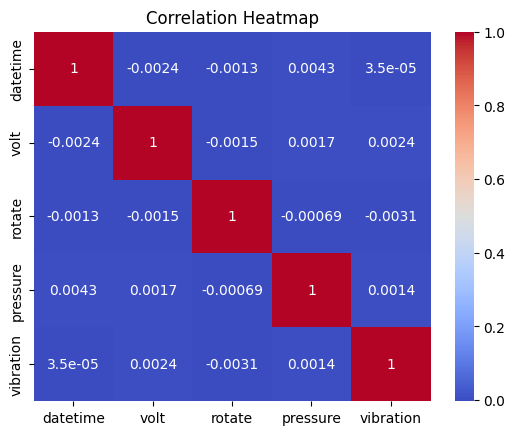

In [11]:
# 1. Correlation heatmap
plt.plot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

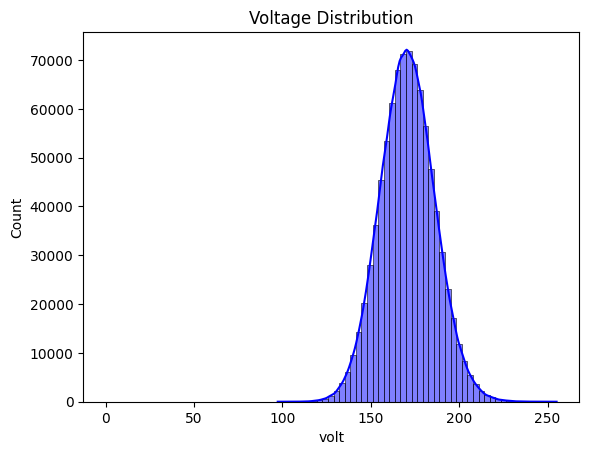

In [12]:
# 2. Distribution of sensor readings
plt.plot(2, 2, 2)
sns.histplot(df['volt'], bins=50, kde=True, color='blue')
plt.title('Voltage Distribution')
plt.show()

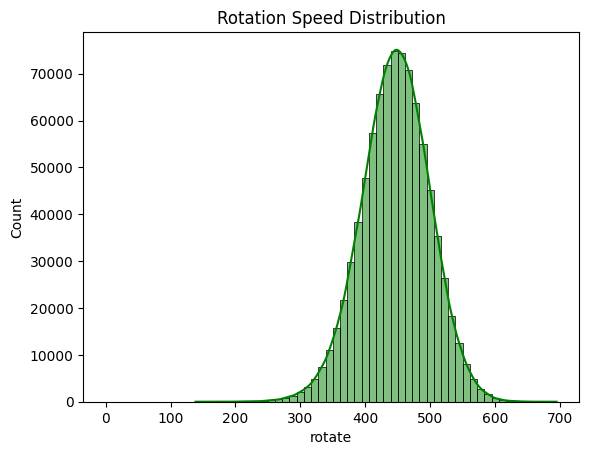

In [13]:
plt.plot(2, 2, 3)
sns.histplot(df['rotate'], bins=50, kde=True, color='green')
plt.title('Rotation Speed Distribution')
plt.show()

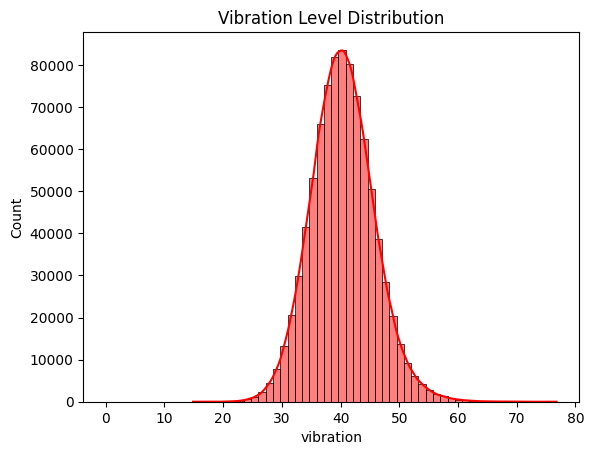

In [17]:
plt.plot(2, 2, 4)
sns.histplot(df['vibration'], bins=50, kde=True, color='red')
plt.title('Vibration Level Distribution')
plt.show()

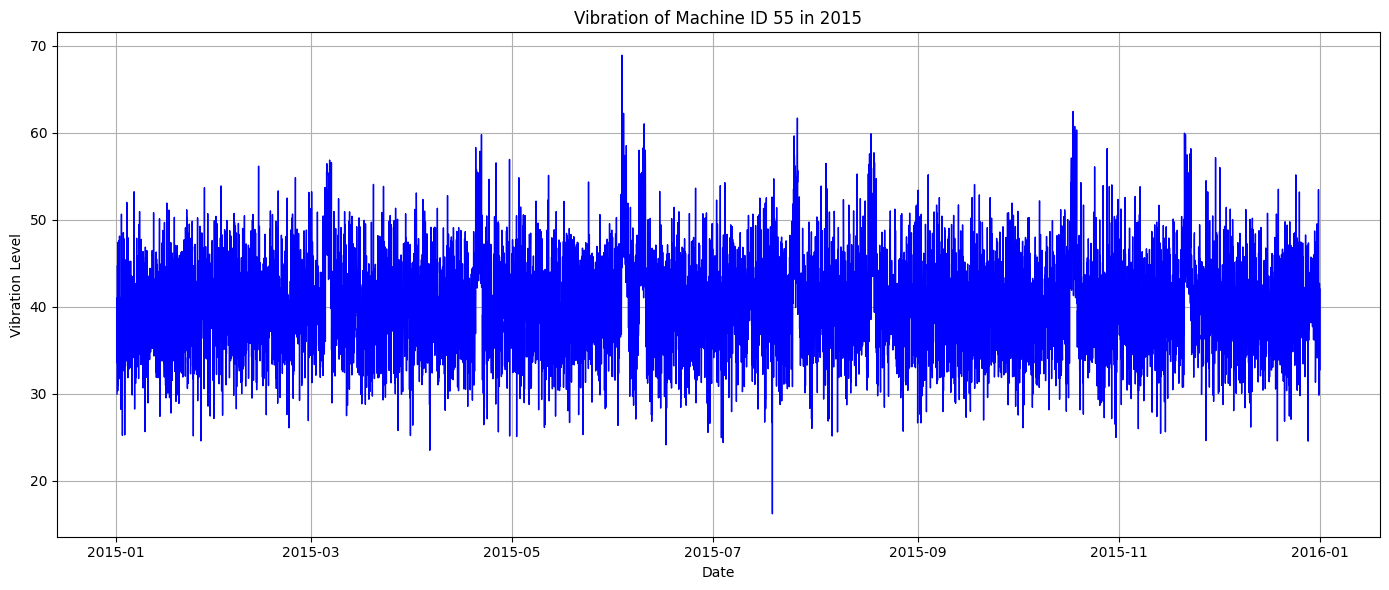

In [18]:
# Filter data for Machine ID 55 and year 2015
df_55_2015 = df[(df['machineID'] == 55) & (df['datetime'].dt.year == 2015)]

# Plotting vibration over time
plt.figure(figsize=(14, 6))
plt.plot(df_55_2015['datetime'], df_55_2015['vibration'], color='blue', linewidth=1)
plt.title('Vibration of Machine ID 55 in 2015')
plt.xlabel('Date')
plt.ylabel('Vibration Level')
plt.grid(True)
plt.tight_layout()
plt.show()


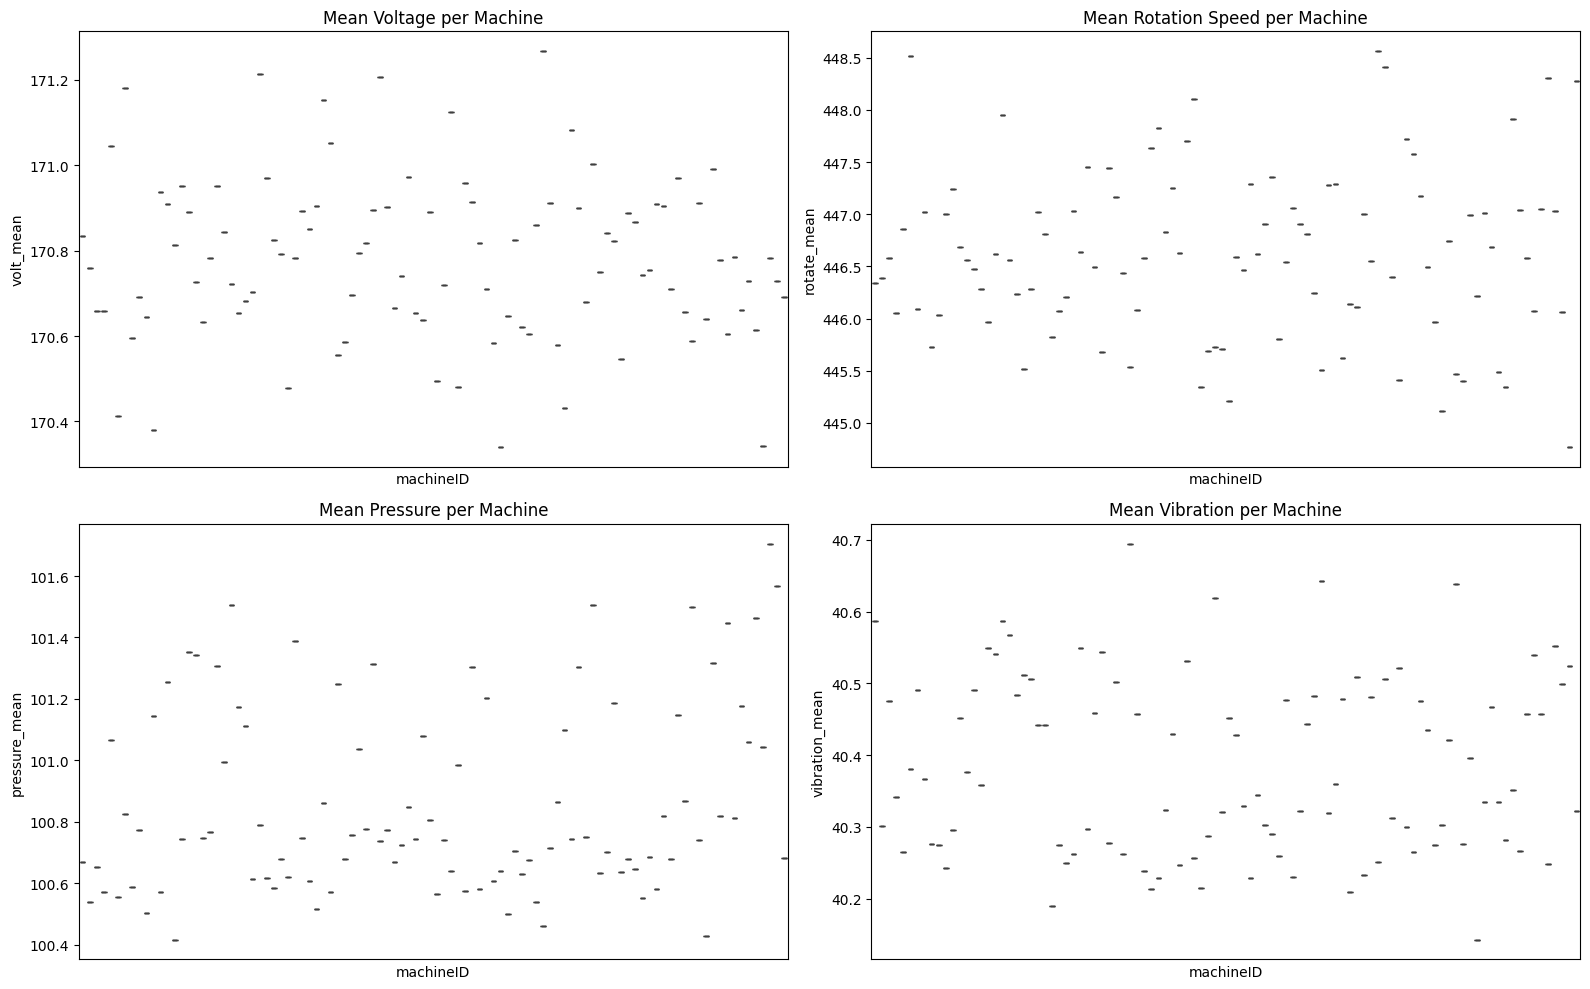

,machineID,volt_mean,volt_std,volt_min,volt_max,rotate_mean,rotate_std,rotate_min,rotate_max,pressure_mean,pressure_std,pressure_min,pressure_max,vibration_mean,vibration_std,vibration_min,vibration_max
0,1,170.833898,15.314388,119.059047,237.938518,446.336502,52.224261,215.619476,636.364569,100.668306,10.860264,58.733724,155.257527,40.586309,5.542143,22.666865,67.633435
1,2,170.760482,15.537243,112.486614,235.114772,446.388915,52.868646,203.707820,629.672001,100.539930,10.746150,65.093896,150.848378,40.301539,5.313053,22.078087,64.097877
2,3,170.659235,15.380310,121.894461,234.950829,446.583238,53.089193,174.126968,634.038755,100.653114,10.921047,54.914013,153.600538,40.475376,5.248968,22.739546,62.866344
3,4,170.659728,15.464553,100.194137,241.516461,446.053801,53.257079,182.466572,638.177765,100.569902,10.711540,63.537136,152.052407,40.341620,5.299423,19.955458,70.365920
4,5,171.044435,15.546820,119.702416,228.298139,446.858577,52.779593,237.040723,652.936808,101.066188,11.313909,58.281550,182.111770,40.264846,5.296243,21.883375,63.252497


In [19]:
# Compute summary statistics per machine
machine_stats = df.groupby('machineID').agg({
    'volt': ['mean', 'std', 'min', 'max'],
    'rotate': ['mean', 'std', 'min', 'max'],
    'pressure': ['mean', 'std', 'min', 'max'],
    'vibration': ['mean', 'std', 'min', 'max']
})

# Flatten column names
machine_stats.columns = ['_'.join(col).strip() for col in machine_stats.columns.values]
machine_stats.reset_index(inplace=True)

# Plot boxplots to show variation across machines
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='machineID', y='volt_mean', data=machine_stats)
plt.xticks([], [])
plt.title('Mean Voltage per Machine')

plt.subplot(2, 2, 2)
sns.boxplot(x='machineID', y='rotate_mean', data=machine_stats)
plt.xticks([], [])
plt.title('Mean Rotation Speed per Machine')

plt.subplot(2, 2, 3)
sns.boxplot(x='machineID', y='pressure_mean', data=machine_stats)
plt.xticks([], [])
plt.title('Mean Pressure per Machine')

plt.subplot(2, 2, 4)
sns.boxplot(x='machineID', y='vibration_mean', data=machine_stats)
plt.xticks([], [])
plt.title('Mean Vibration per Machine')

plt.tight_layout()
plt.show()

machine_stats.head()


C:\Users\user\AppData\Local\Temp\ipykernel_5600\954435599.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='volt', data=df_2015, palette='coolwarm')


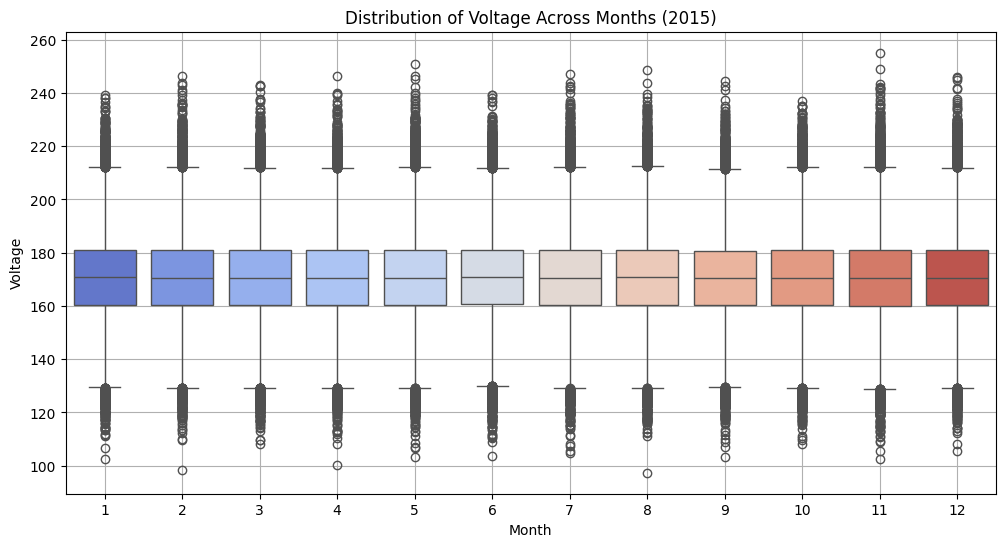

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year and month
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Optional: Filter to a specific year (e.g., 2015)
df_2015 = df[df['year'] == 2015]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='volt', data=df_2015, palette='coolwarm')
plt.title('Distribution of Voltage Across Months (2015)')
plt.xlabel('Month')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd

# Load dataset
errors_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_errors.csv")

# View basic info and first few rows
print(errors_df.info())
print(errors_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB
None
              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4


In [22]:
print("Missing values:\n", errors_df.isnull().sum())
print("\nDuplicates:", errors_df.duplicated().sum())


Missing values:
 datetime     0
machineID    0
errorID      0
dtype: int64

Duplicates: 0


In [23]:
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'])


In [24]:
print(errors_df.describe(include='all'))


                             datetime    machineID errorID
count                            3919  3919.000000    3919
unique                            NaN          NaN       5
top                               NaN          NaN  error1
freq                              NaN          NaN    1010
mean    2015-07-01 03:34:18.586374144    51.044654     NaN
min               2015-01-01 06:00:00     1.000000     NaN
25%               2015-03-31 05:00:00    25.000000     NaN
50%               2015-07-01 06:00:00    51.000000     NaN
75%               2015-10-01 15:00:00    77.000000     NaN
max               2016-01-01 05:00:00   100.000000     NaN
std                               NaN    28.954988     NaN


In [25]:
# Count errors by type
print(errors_df['errorID'].value_counts())

# Count errors per machine
print(errors_df['machineID'].value_counts())

# Cross-tab of machine vs error type
print(pd.crosstab(errors_df['machineID'], errors_df['errorID']))


errorID
error1    1010
error2     988
error3     838
error4     727
error5     356
Name: count, dtype: int64
machineID
22    60
78    54
99    54
49    51
81    51
      ..
19    28
86    27
31    26
6     23
77    22
Name: count, Length: 100, dtype: int64
errorID    error1  error2  error3  error4  error5
machineID                                        
1              11       6       9       5       4
2               5      10       5       5       3
3              11      10       8       8       2
4              10      11       8       2       0
5              14       8       7       6       3
...           ...     ...     ...     ...     ...
96              5      10       8      12       4
97             12       8       5      15       5
98              9      12       8      11       5
99              9      17      15       8       5
100            11       7       8       4       1

[100 rows x 5 columns]


<Axes: title={'center': 'Monthly Error Count'}, xlabel='month'>

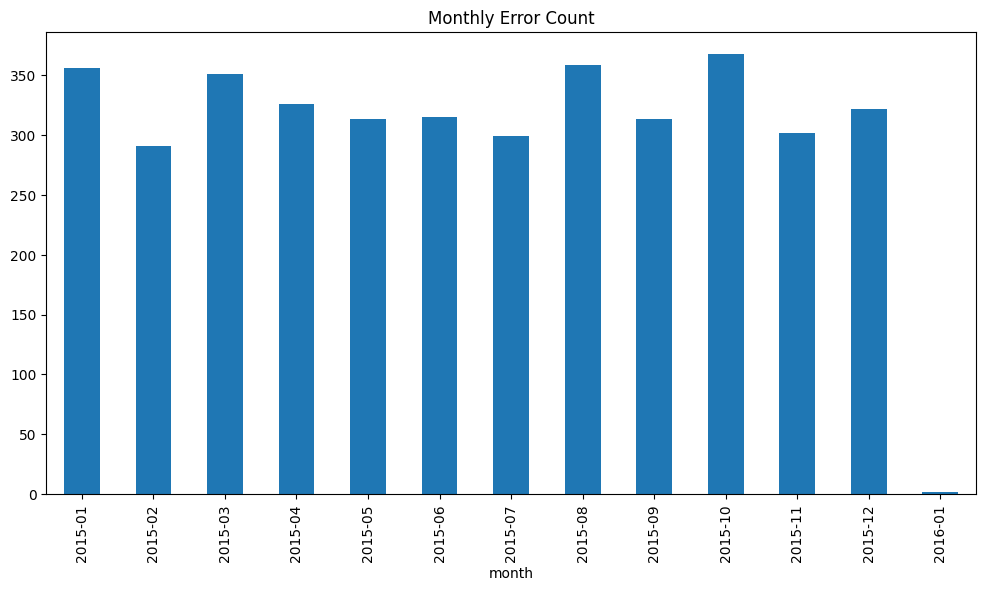

In [26]:
errors_df['month'] = errors_df['datetime'].dt.to_period('M')
monthly_errors = errors_df.groupby('month').size()

monthly_errors.plot(kind='bar', figsize=(12, 6), title='Monthly Error Count')


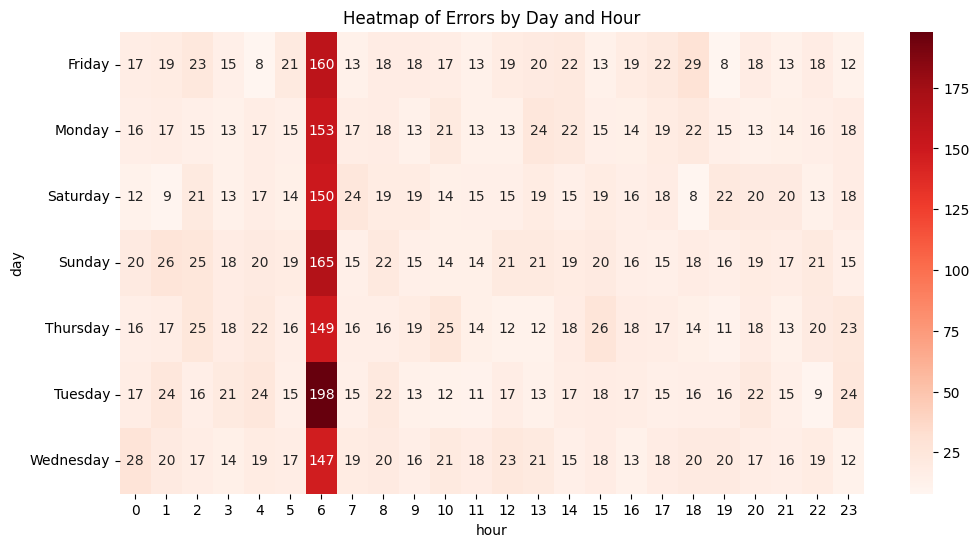

In [27]:
errors_df['hour'] = errors_df['datetime'].dt.hour
errors_df['day'] = errors_df['datetime'].dt.day_name()

import seaborn as sns
import matplotlib.pyplot as plt

pivot = errors_df.pivot_table(index='day', columns='hour', values='errorID', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Reds')
plt.title("Heatmap of Errors by Day and Hour")
plt.show()


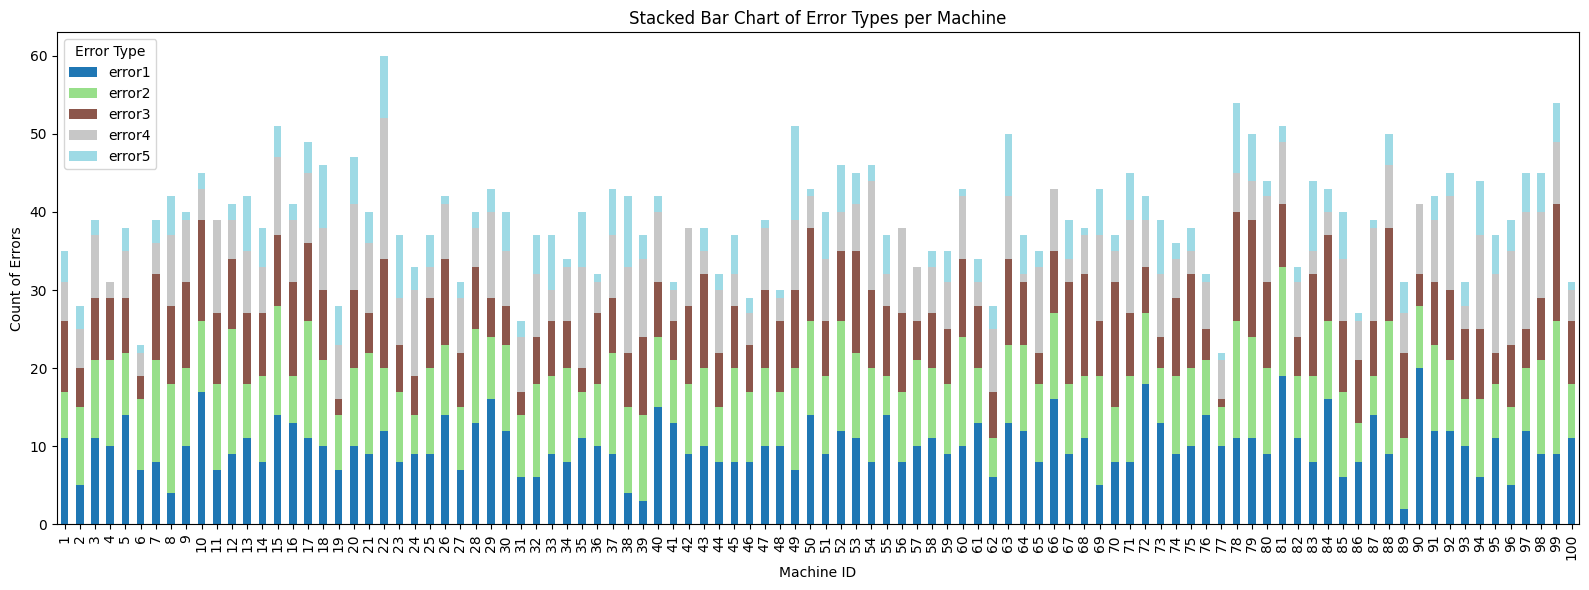

In [30]:
machine_error_ct.plot(kind='bar', stacked=True, figsize=(16, 6), colormap='tab20')
plt.title("Stacked Bar Chart of Error Types per Machine")
plt.xlabel("Machine ID")
plt.ylabel("Count of Errors")
plt.legend(title="Error Type")
plt.tight_layout()
plt.show()

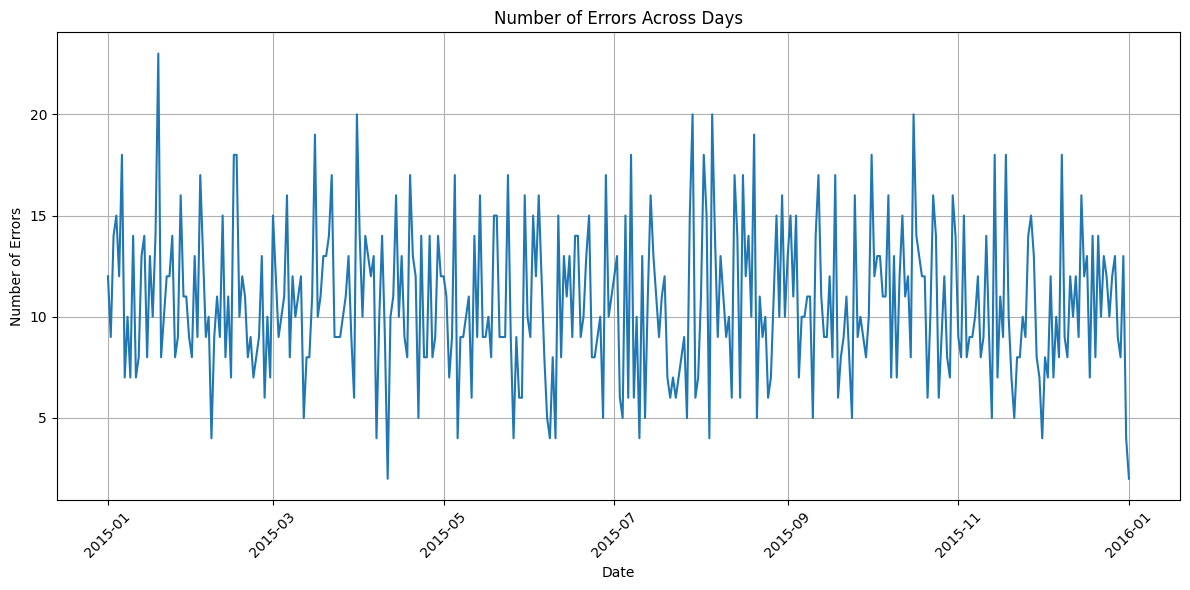

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is in datetime format
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'])

# Extract just the date part (no time)
errors_df['date'] = errors_df['datetime'].dt.date

# Count number of errors per day
errors_per_day = errors_df.groupby('date').size()

# Plot
plt.figure(figsize=(12, 6))
errors_per_day.plot(kind='line')
plt.title('Number of Errors Across Days')
plt.xlabel('Date')
plt.ylabel('Number of Errors')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

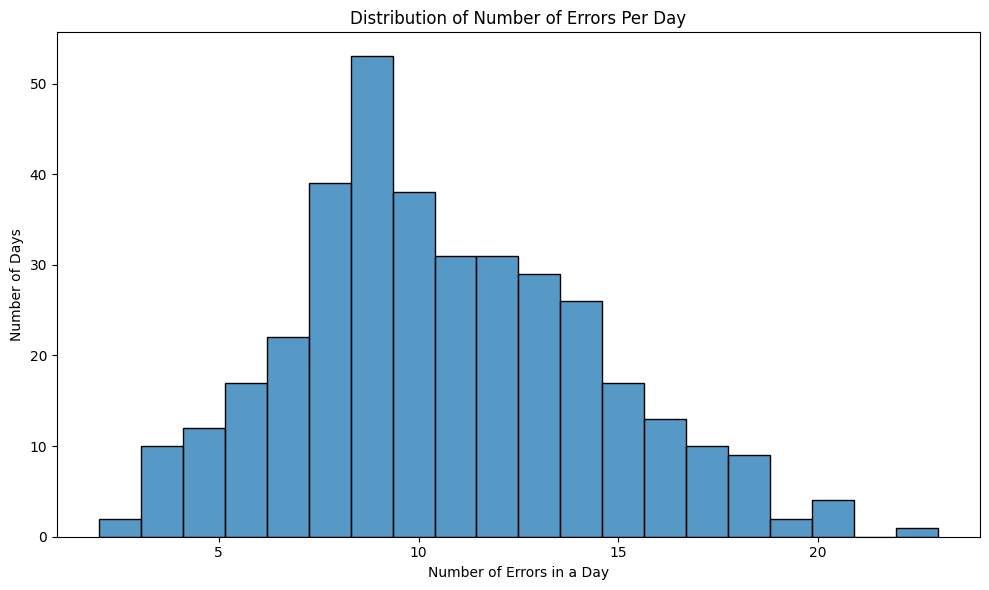

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'datetime' column is datetime
errors_df['datetime'] = pd.to_datetime(errors_df['datetime'])

# Get number of errors per day
errors_df['date'] = errors_df['datetime'].dt.date
errors_per_day = errors_df.groupby('date').size()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors_per_day, bins=20, kde=False)
plt.title('Distribution of Number of Errors Per Day')
plt.xlabel('Number of Errors in a Day')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()


In [14]:
maint_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_maint.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_14028\1255748244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=maint_df, x='comp', order=maint_df['comp'].value_counts().index, palette='viridis')


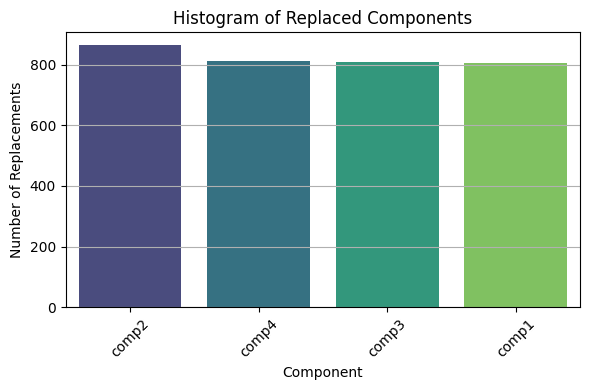

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=maint_df, x='comp', order=maint_df['comp'].value_counts().index, palette='viridis')
plt.title('Histogram of Replaced Components')
plt.xlabel('Component')
plt.ylabel('Number of Replacements')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

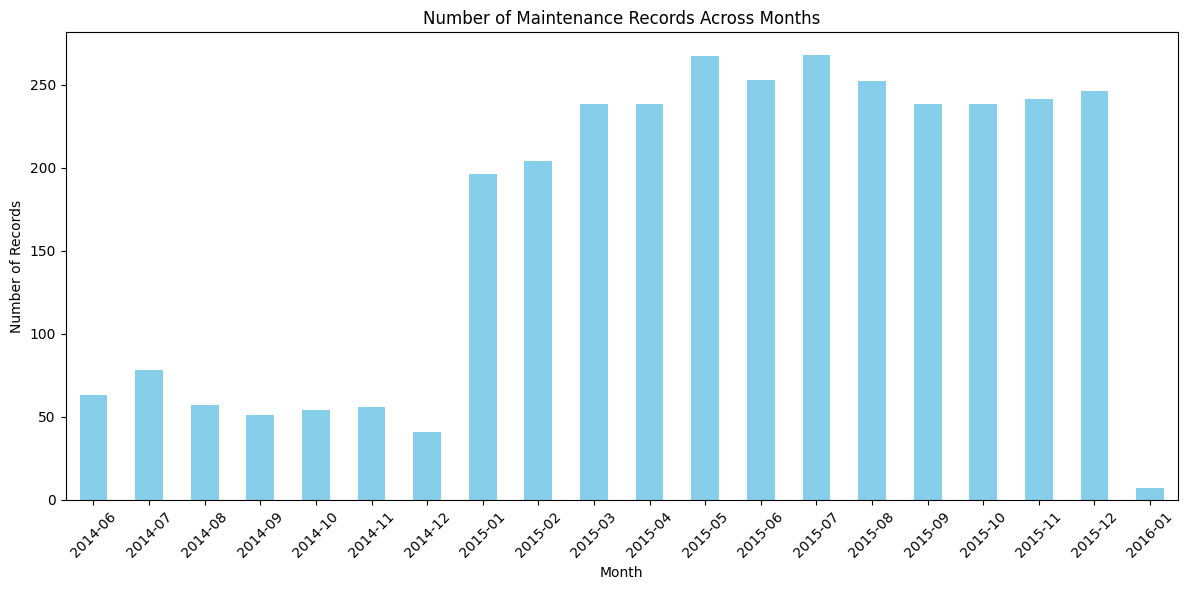

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is in datetime format
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])

# Extract month-year
maint_df['month'] = maint_df['datetime'].dt.to_period('M')  # e.g., 2025-06

# Count records per month
monthly_counts = maint_df.groupby('month').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Maintenance Records Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
num_records = len(maint_df)
print(f"Total number of maintenance records: {num_records}")

Total number of maintenance records: 3286


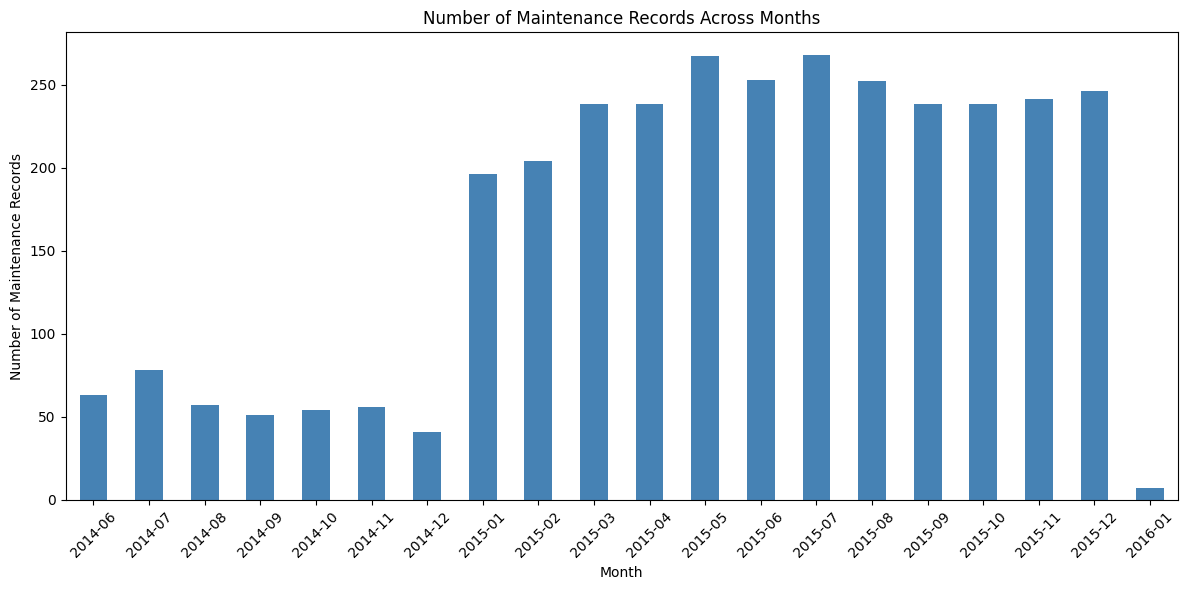

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime if needed
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])

# Extract month
maint_df['month'] = maint_df['datetime'].dt.to_period('M')

# Count maintenance records per month
monthly_counts = maint_df.groupby('month').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='steelblue')
plt.title('Number of Maintenance Records Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

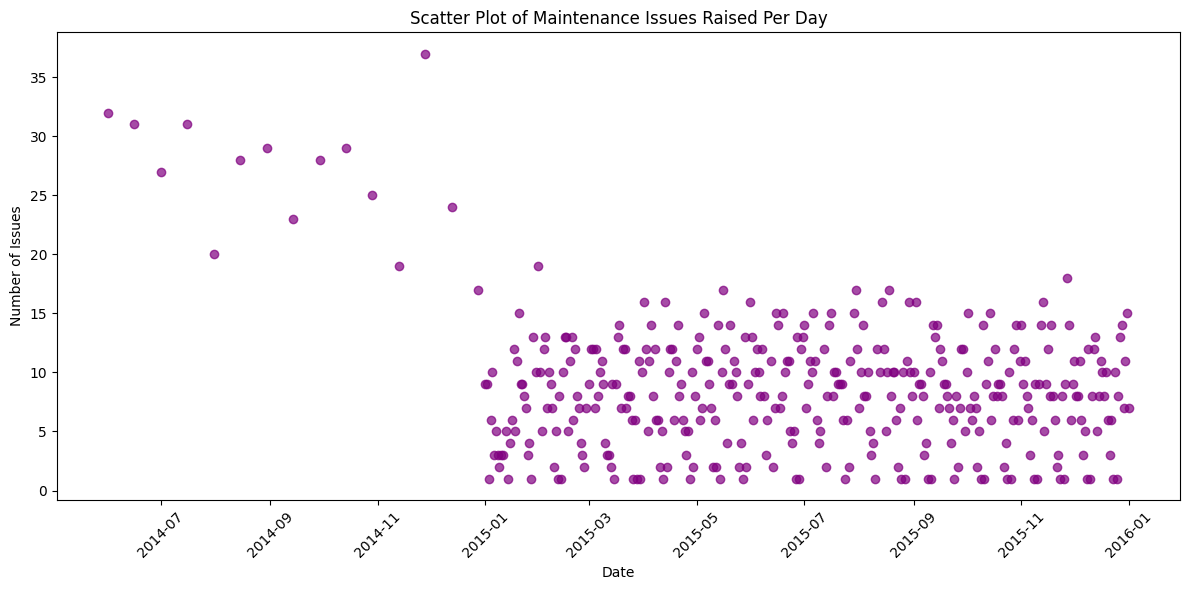

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert datetime and extract date
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
maint_df['date'] = maint_df['datetime'].dt.date

# Group by date and count issues
daily_issues = maint_df.groupby('date').size().reset_index(name='issue_count')

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(daily_issues['date'], daily_issues['issue_count'], color='purple', alpha=0.7)
plt.title('Scatter Plot of Maintenance Issues Raised Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
#Importing Libraries and defining functions for plotting the data using **matplotlib**
import os
import sys
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

matplotlib.style.use("Solarize_Light2")

%matplotlib inline

In [2]:
telemetry_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_telemetry.csv")
errors_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_errors.csv")
maint_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_maint.csv")
failure_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_failures.csv")
machines_df = pd.read_csv("C:/Users/user/Downloads/archive (8)/PdM_machines.csv")

#Date and Time Formatting, Sorting based on Date for better readability
tables = [telemetry_df,errors_df,maint_df,failure_df]
for df in tables:
  df["datetime"] = pd.to_datetime(df["datetime"], format = "%Y-%m-%d %H:%M:%S")
  df.sort_values(["datetime","machineID"],inplace=True, ignore_index = True)

In [3]:
failure_df.head()

,datetime,machineID,failure
0,2015-01-02 03:00:00,16,comp1
1,2015-01-02 03:00:00,16,comp3
2,2015-01-02 03:00:00,17,comp4
3,2015-01-02 03:00:00,22,comp1
4,2015-01-02 03:00:00,35,comp1


In [4]:
#First few rows of Telemetry data for Machine 1
telemetry_df[telemetry_df.machineID==1].head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
100,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
200,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
300,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
400,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [6]:
telemetry_df.machineID.nunique()

100

In [9]:
telemetry_df['datetime'].describe()

count                 876100
mean     2015-07-02 18:00:00
min      2015-01-01 06:00:00
25%      2015-04-02 12:00:00
50%      2015-07-02 18:00:00
75%      2015-10-02 00:00:00
max      2016-01-01 06:00:00
Name: datetime, dtype: object

In [11]:
duplicates = telemetry_df[telemetry_df.duplicated(subset=['datetime', 'machineID'], keep=False)]

print(f"Number of duplicates: {len(duplicates)}")
print(duplicates.head())

Number of duplicates: 0
Empty DataFrame
Columns: [datetime, machineID, volt, rotate, pressure, vibration]
Index: []


In [13]:
print(f"Shape of the Telemetry Record: {telemetry_df.shape}")
df_sin = telemetry_df.loc[telemetry_df['machineID']==40].reset_index(drop=True)
df_sin.head(n=5)

Shape of the Telemetry Record: (876100, 6)


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,40,157.783778,423.603828,103.664482,44.102725
1,2015-01-01 07:00:00,40,156.709284,342.090620,89.495272,33.885141
2,2015-01-01 08:00:00,40,158.911438,382.368397,86.431858,35.227865
3,2015-01-01 09:00:00,40,162.457368,401.087837,95.389411,45.048647
4,2015-01-01 10:00:00,40,138.074836,485.822257,92.830972,32.895939


In [16]:
sel_fail = failure_df.loc[failure_df['machineID']==40]
pd.DataFrame(sel_fail)

,datetime,machineID,failure
23,2015-01-04 06:00:00,40,comp3
125,2015-02-18 06:00:00,40,comp1
221,2015-04-04 06:00:00,40,comp1
342,2015-06-03 06:00:00,40,comp3
369,2015-06-18 06:00:00,40,comp2
403,2015-07-03 06:00:00,40,comp1
491,2015-08-17 06:00:00,40,comp2
699,2015-11-30 06:00:00,40,comp1
728,2015-12-15 06:00:00,40,comp3


In [17]:
sel_err = errors_df.loc[errors_df['machineID']==40]
pd.DataFrame(sel_err).head()

,datetime,machineID,errorID
26,2015-01-03 06:00:00,40,error4
381,2015-02-03 03:00:00,40,error1
417,2015-02-06 01:00:00,40,error1
534,2015-02-16 22:00:00,40,error3
540,2015-02-17 06:00:00,40,error1


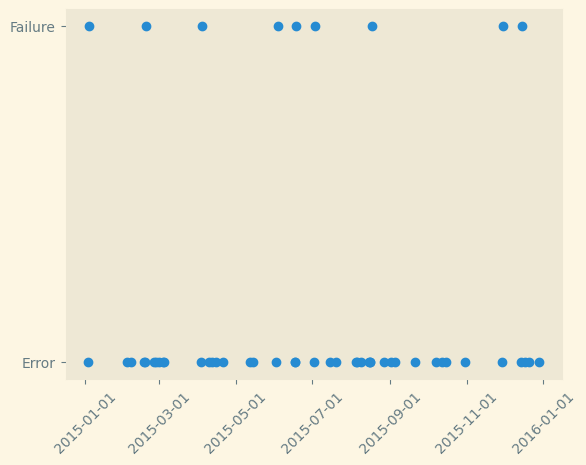

In [18]:
fig, ax = plt.subplots()

#Using two values in the y-axis to make it simpler and differentiate between Error and Failure
y_category = list()

for iter in range(0, len(sel_fail)):
  y_category.append("Failure")

for iter in range(0, len(sel_err)):
  y_category.append("Error")

#Timestamp from error and selected failure
timestamp_df = pd.concat([sel_fail['datetime'],sel_err['datetime']], ignore_index=True, axis = 0)
plot_df = pd.DataFrame({'timestamp':timestamp_df,"category":y_category})
plot_df.loc[:, 'timestamp'] = pd.to_datetime(plot_df.loc[:, 'timestamp'])
plot_df.sort_values(by=['timestamp'],inplace = True, ignore_index=True)

# Plotting timestamp as per x-axis
ax.scatter('timestamp', 'category', data = plot_df)
year_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(year_fmt)
ax.tick_params(axis='x',rotation=45)
ax.grid()

In [19]:
df_sin.loc[:, 'datetime'] = pd.to_datetime(df_sin.loc[:, 'datetime'])
st = df_sin.loc[df_sin['datetime']=="2015-02-19"].index.values[0]

In [20]:
#Filtering the telemetry data by the date and allow 7 days before and after
#The error will occure to check any abnormalities
select = df_sin.loc[st-7*24:st + 7*24, :]

Text(0, 0.5, 'Rotation')

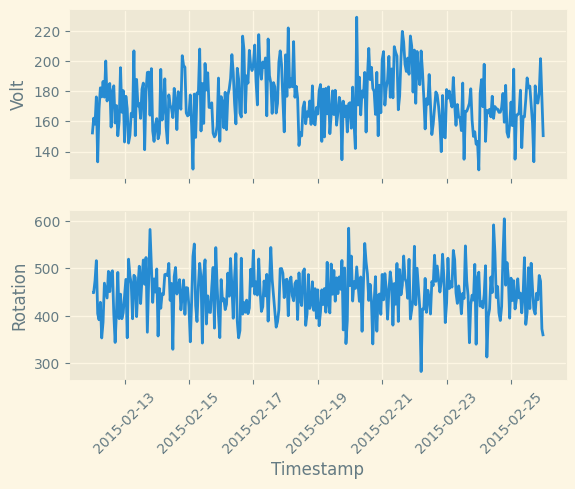

In [21]:
#Plot Volt and Rotation Feature
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot('datetime','volt', data=select)
ax[0].set_ylabel('Volt')

ax[1].plot('datetime','rotate',data=select)
ax[1].tick_params(axis='x',rotation = 45)
ax[1].set_xlabel("Timestamp")
ax[1].set_ylabel("Rotation")

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(df, feature_name, log=False, bins=50):
    plt.figure(figsize=(8, 4))
    data = df[feature_name]
    if log:
        data = data[data > 0]  # remove non-positive values before log
        data = np.log(data)
        plt.title(f'Log Histogram of {feature_name}')
    else:
        plt.title(f'Histogram of {feature_name}')
    
    sns.histplot(data, bins=bins, kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

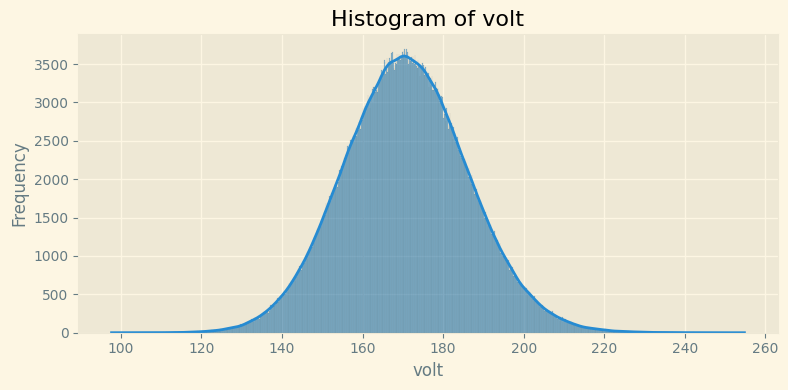

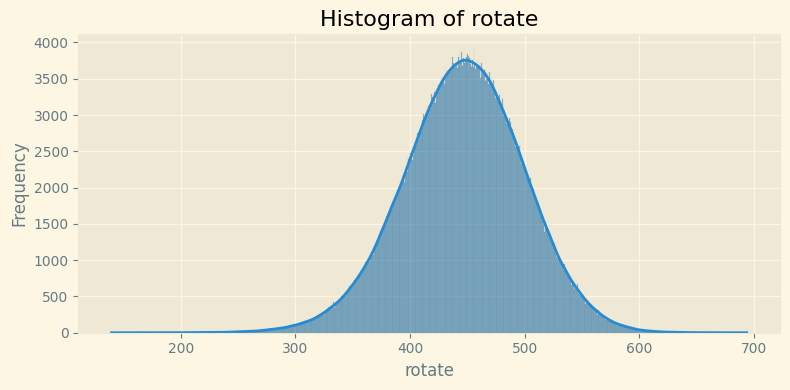

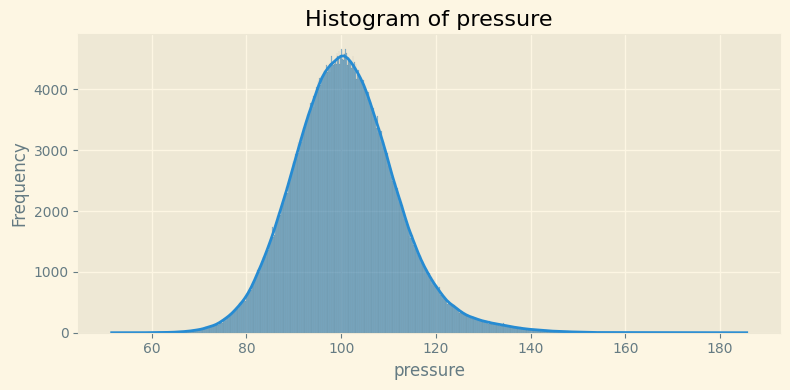

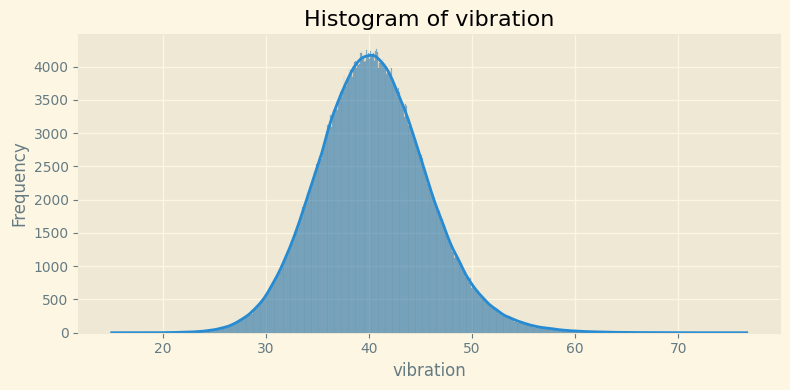

In [24]:
for name in ['volt','rotate','pressure','vibration']:
  plot_hist(telemetry_df, feature_name=name, log=False, bins=1000)

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

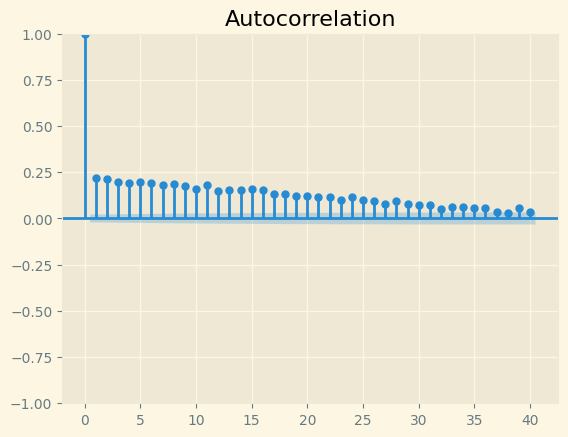

In [26]:
plot_acf(df_sin['pressure'],lags=40)
plt.show()

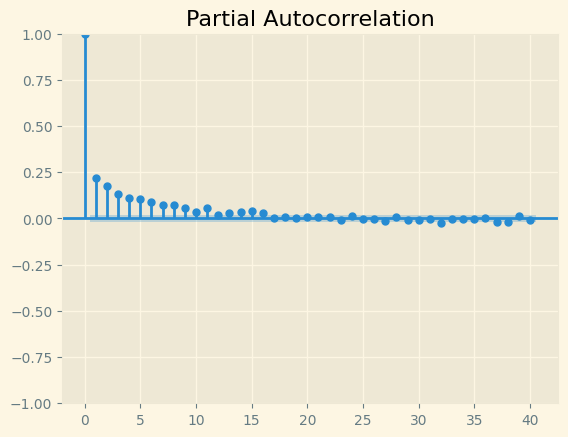

In [27]:
plot_pacf(df_sin['pressure'],lags=40)
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Selecting the date to check from failure records
st_train = df_sin.loc[df_sin['datetime']=="2015-03-20"].index.values[0]

#Filtering data to include approximately one month window
start_period = st_train-14*24
end_period = st_train+14*24

In [29]:
def create_feature(start,end):  #Creating Feature from selected machine
  pressure = df_sin.loc[start: end, 'pressure']
  timestamp = pd.to_datetime(df_sin.loc[start: end, 'datetime'])
  timestamp_hour = timestamp.map(lambda x: x.hour)
  timestamp_dow = timestamp.map(lambda x: x.dayofweek)

  #Applying one-hot encode for timestamp data
  timestamp_hour_onehot = pd.get_dummies(timestamp_hour).to_numpy()

  #Applying Min Max to numerical data
  scaler = MinMaxScaler()
  pressure = scaler.fit_transform(np.array(pressure).reshape(-1,1))

  #Combining Features Into One
  feature = np.concatenate([pressure, timestamp_hour_onehot],axis=1)
  X = feature[:-1]
  y = np.array(feature[5:,0]).reshape(-1,1)
  return X, y, scaler

X, y, pres_scaler = create_feature(start_period, end_period)

In [30]:
def shape_sequence(arr, step, start):
  out = list()
  for i in range(start, arr.shape[0]):
    low_lim = i
    up_lim = low_lim + step
    out.append(arr[low_lim: up_lim])

    if up_lim == arr.shape[0]:
      break

  out_seq = np.array(out)
  return out_seq

#Shaping the sequence according to the length
X_seq = shape_sequence(X,5,0)
y_seq = shape_sequence(y,1,0)

#Seperating Input and Output for train and Validation
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

print("Training Data Shape: ", X_train.shape)
print("Validating Data Shape: ", X_val.shape)

Training Data Shape:  (534, 5, 25)
Validating Data Shape:  (134, 5, 25)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.losses as loss

def create_model(X_train, y_train):
  shape = X_train.shape[1]
  feat_length = X_train.shape[2]

  model = Sequential()
  model.add(LSTM(shape, activation='tanh', input_shape = (shape, feat_length), return_sequences=True))
  model.add(LSTM(shape, activation = 'tanh',input_shape=(shape, feat_length), return_sequences=False))
  model.add(Dense(shape, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer=Adam(learning_rate=0.035), loss=loss.MeanSquaredError)
  model.fit(X_train, y_train, verbose=1, epochs=500)
  return model 

model = create_model(X_train, y_train)

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1177 
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0259
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262  
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 
Epoch 10/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 
Epoch 11/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 
Epoch 12/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 
Epoch 13/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 
Epoch 14/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 
Epoch 15/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step 
Validation Error:  0.05599439


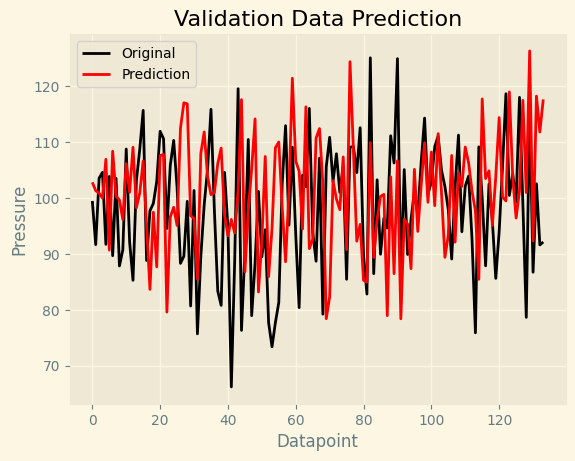

In [38]:
y_pred = model.predict(X_val)
mse = MeanSquaredError()
val_er = mse(y_val.reshape(-1,1),y_pred)
print("Validation Error: ", val_er.numpy())

plt.plot(pres_scaler.inverse_transform(y_val.reshape(-1,1)),'k', label='Original')
plt.plot(pres_scaler.inverse_transform(y_pred.reshape(-1,1)),'r', label='Prediction')
plt.ylabel("Pressure")
plt.xlabel("Datapoint")
plt.title("Validation Data Prediction")
plt.legend()
plt.show()